In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
data = pd.read_csv("OldCarsDataset.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# check the null values in columns
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
# delete the missing values if the data ofmissing values is less than 5% 
data_without_MV = data.dropna(axis = 0)
data_without_MV.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\hp\AppData\Local\Temp\ipykernel_12032\2161175050.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_MV["Price"])


<Axes: xlabel='Price', ylabel='Density'>

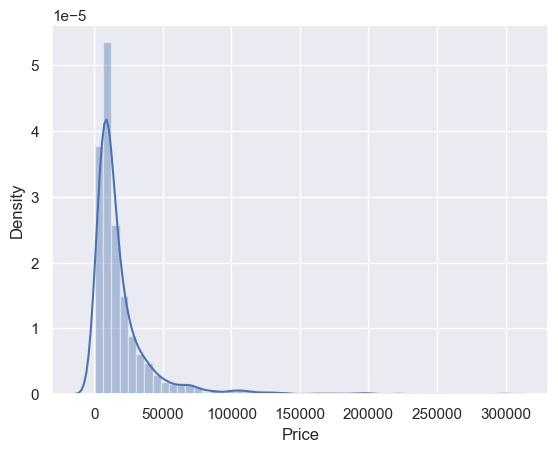

In [6]:
# To check the variables distribution using distplot 
sns.distplot(data_without_MV["Price"])

In [7]:
# hence we can see that in above data that varibles are distributed correctly but their 
# some data are out of range or not valid 
# if these sitution are arrise and outliers are present then we can delete 0.5% to 1% data
# or can take only valid data by our knowledge

In [8]:
# price outlier are present in right side so we can delete 1% from right side
q = data_without_MV["Price"].quantile(0.99) # store 99% data in q
data_1 = data_without_MV[data_without_MV["Price"]<q]
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\hp\AppData\Local\Temp\ipykernel_12032\987466458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["Mileage"])


<Axes: xlabel='Mileage', ylabel='Density'>

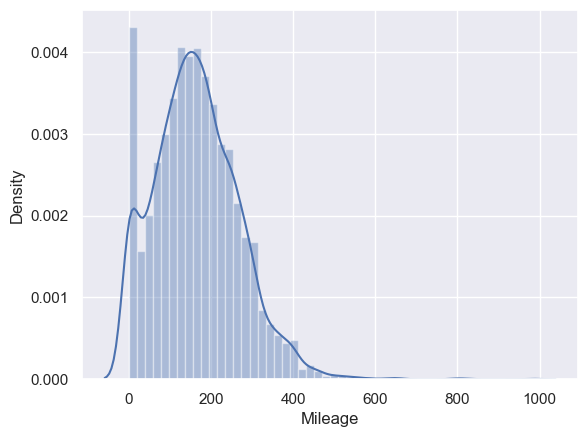

In [9]:
sns.distplot(data_1["Mileage"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\2244088817.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Mileage"])


<Axes: xlabel='Mileage', ylabel='Density'>

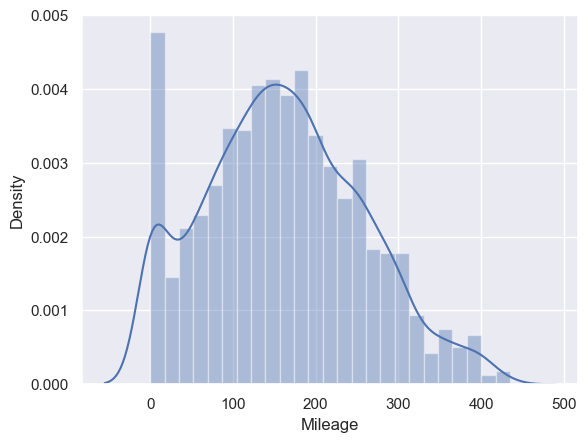

In [10]:
# same in Mileage the outliers are present in left side so delete 1% from right side
q = data_1["Mileage"].quantile(0.99) 
data_2 = data_1[data_1["Mileage"]<q]
sns.distplot(data_2["Mileage"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\4095136911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["EngineV"])


<Axes: xlabel='EngineV', ylabel='Density'>

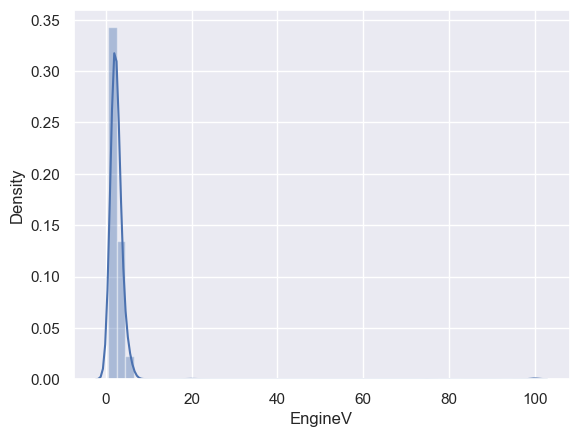

In [11]:
sns.distplot(data_2["EngineV"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\1706737021.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3["EngineV"])


<Axes: xlabel='EngineV', ylabel='Density'>

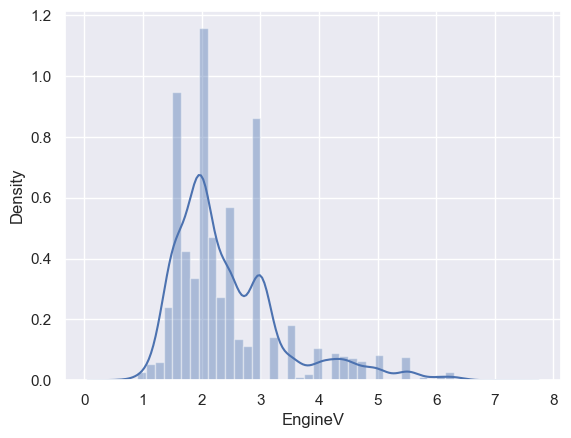

In [12]:
# after the google search I found the highest engine ever made for any production car is 8.0 liters 
# so in EngineV most data are incorrect so it effect on our model 
# so we delete the data which have value more then 8.0 liters
data_3 = data_2[data_2["EngineV"]<8.0]
sns.distplot(data_3["EngineV"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\2318934823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3["Year"])


<Axes: xlabel='Year', ylabel='Density'>

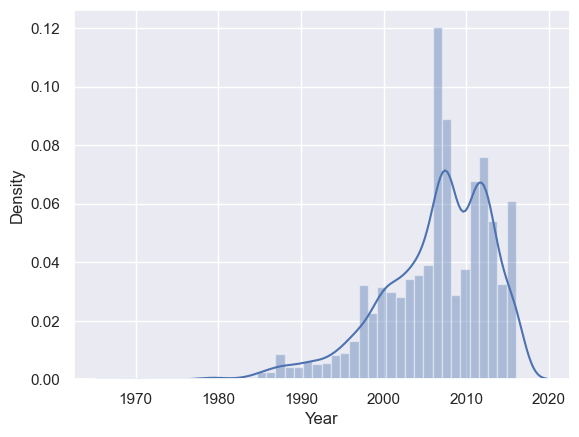

In [13]:
sns.distplot(data_3["Year"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\123595544.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4["Year"])


<Axes: xlabel='Year', ylabel='Density'>

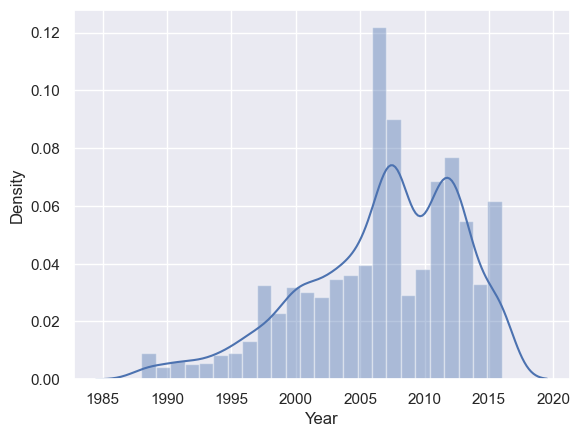

In [14]:
# in graph we can see that outlier are present in left side so delete 1% from left side
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]
sns.distplot(data_4["Year"])

In [15]:
data_cleaned = data_4.reset_index(drop = "True")
data_cleaned.describe(include ="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3869,3869.000000,3869,3869.000000,3869.000000,3869,3869,3869.000000,3869
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1469,NaN,NaN,1807,3507,NaN,181
mean,NaN,18196.862267,NaN,160.532437,2.452714,NaN,NaN,2006.711295,NaN
std,NaN,19083.381768,NaN,95.610571,0.954409,NaN,NaN,6.102717,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


## Relaxing the assumptions 

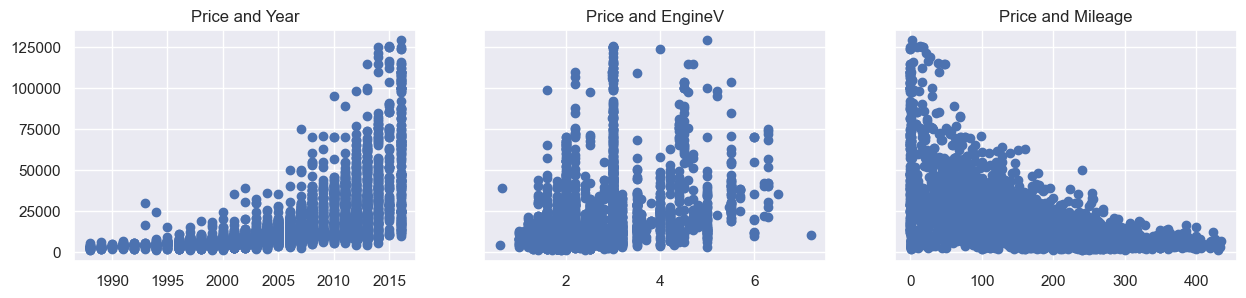

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\2845240188.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

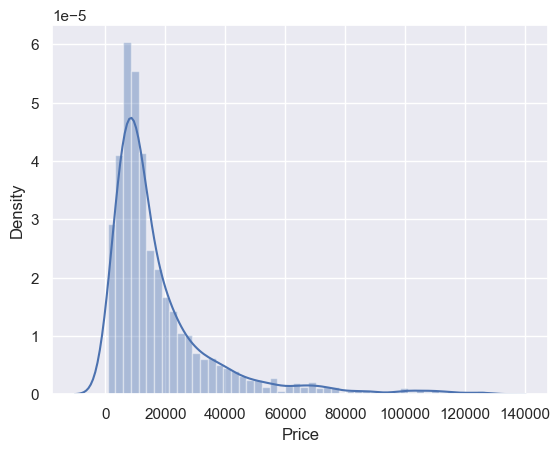

In [18]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

In [19]:
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3864,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3865,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3866,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3867,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


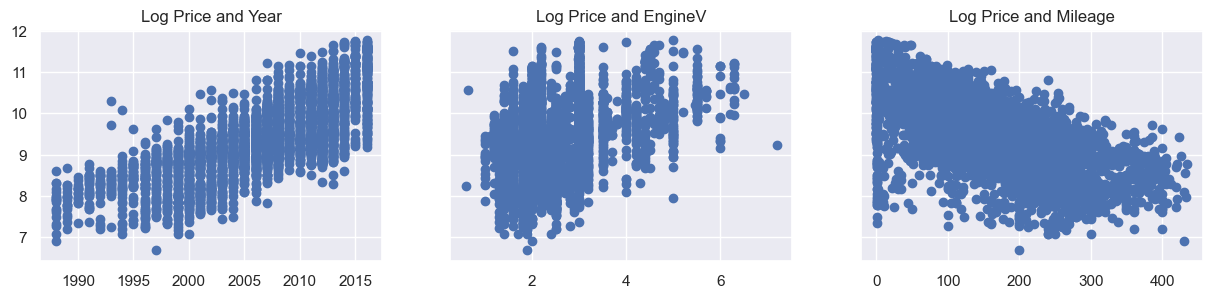

In [20]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [21]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values.astype(int), i)for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.794077,Mileage
1,-0.820477,Year
2,5.043307,EngineV


In [23]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,1991,8.342840,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,1999,8.974618,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,2003,9.495519,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,2007,10.043249,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,2011,9.814656,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,163,2.5,2008,9.350102,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3865,35,1.6,2014,9.792556,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3866,9,3.0,2014,11.736069,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3867,1,3.5,1999,8.779557,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
data_preprossed = data_with_dummies
data_preprossed

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,1991,8.342840,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,1999,8.974618,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,2003,9.495519,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,2007,10.043249,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,2011,9.814656,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,163,2.5,2008,9.350102,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3865,35,1.6,2014,9.792556,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3866,9,3.0,2014,11.736069,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3867,1,3.5,1999,8.779557,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# select inputs and targets
targets = data_preprossed["log_price"]
inputs = data_preprossed.drop(["log_price"] , axis = 1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [27]:
x_scaled = scaler.transform(inputs)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, targets , test_size = 0.2, random_state = 42)

In [29]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [30]:
#outputs of regression model
y_hat = reg.predict(x_train)

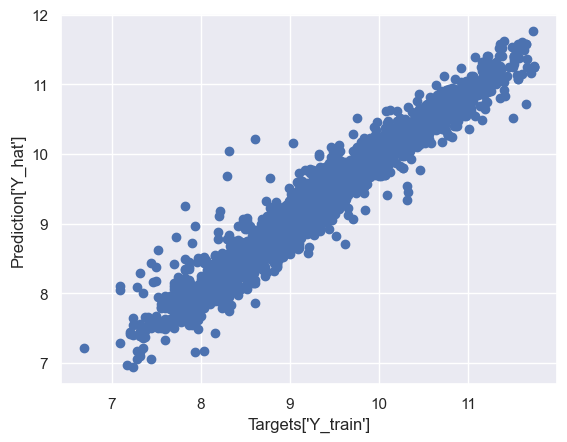

In [31]:
# let plot them
plt.scatter(y_train, y_hat)
plt.xlabel("Targets['Y_train']")
plt.ylabel("Prediction['Y_hat']")
plt.show()

In [32]:
# R squared
reg.score(x_train, y_train)

0.940727400018183

In [33]:
#Adjusted R Square
def AdjR2(x, y):
    r2 = reg.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjr2
AdjR2(x_train, y_train)
# Accuracy of model

0.9341746502714494

In [34]:
reg.intercept_

-202764657683.45932

In [35]:
reg.coef_

array([-6.82469811e-02,  6.09844345e-02,  5.46664805e-01,  1.33614985e+12,
        1.44047584e+12,  2.17265765e+12, -2.45475036e+12,  3.39382132e+11,
        5.97136922e+11,  4.24194336e-03, -5.52368164e-03, -2.42919922e-02,
       -3.17382812e-02, -2.47802734e-02, -3.00292969e-02, -9.27734375e-03,
       -3.84521484e-02,  2.50305176e-01,  2.25765203e+11,  1.83688831e+11,
        2.24304199e-02,  2.50854492e-02, -4.56237793e-03,  2.59741654e+11,
        3.69262695e-02,  2.96020508e-02,  2.35290527e-02,  2.87017822e-02,
        2.65960693e-02,  2.80838658e+12,  1.77917480e-02,  1.88369751e-02,
        3.94897461e-02,  8.87451172e-02,  1.28906250e-01,  1.63269043e-02,
        5.04760742e-02,  5.70220947e-02,  4.95071411e-02,  3.25393677e-02,
        2.05459595e-02,  1.92260742e-02,  4.21213814e+10,  2.80761719e-02,
        4.14962769e-02,  1.66481018e-01,  5.60302734e-02,  1.99785233e-02,
        1.26541138e-01,  7.90863037e-02,  1.25350952e-01,  8.80126953e-02,
        4.60205078e-02,  

In [36]:
# summary table 
reg_summary = pd.DataFrame(inputs.columns.values , columns = ["Features"])
reg_summary["Bias"] = reg.coef_
reg_summary

,Features,Bias
0,Mileage,-6.824698e-02
1,EngineV,6.098443e-02
2,Year,5.466648e-01
3,Brand_BMW,1.336150e+12
4,Brand_Mercedes-Benz,1.440476e+12
...,...,...
303,Model_X6,1.533356e-01
304,Model_X6 M,5.752563e-02
305,Model_Yaris,1.573387e+11
306,Model_Z3,2.316284e-02


C:\Users\hp\AppData\Local\Temp\ipykernel_12032\2477980280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

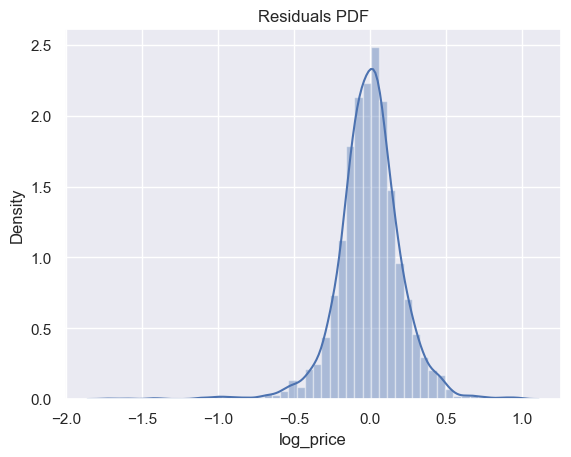

In [37]:
# to check the accuracy of model resduials are used
sns.distplot(y_train - y_hat)
# Include a title
plt.title("Residuals PDF")

In [38]:
# check all unique categorial variables
print(data_cleaned["Brand"].unique())
print(data_cleaned["Body"].unique())
print(data_cleaned["Engine Type"].unique())
print(data_cleaned["Registration"].unique())
print(data_cleaned["Model"].unique())

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
['Petrol' 'Diesel' 'Gas' 'Other']
['yes' 'no']
['320' 'Sprinter 212' 'S 500' 'Q7' 'Rav 4' 'A6' 'Megane' 'Golf IV' '19'
 'A6 Allroad' 'Passat B6' 'Land Cruiser 100' 'Clio' '318' 'Hilux' 'Polo'
 'Outlander' 'A8' 'Touareg' 'Vito' 'Colt' '100' 'Z4' 'Pajero Wagon' 'X5'
 'Caddy' 'Camry' '528' 'TT' 'G 55 AMG' 'X6' '525' 'Kangoo' 'ML 350' '730'
 'Trafic' 'S 350' 'Lancer' 'E-Class' 'Scenic' '330' 'Passat B5' 'A3'
 'Land Cruiser Prado' 'Caravelle' 'Avensis' 'GL 320' 'GL 450' 'Lancer X'
 '200' '520' 'Tiguan' 'Outlander XL' 'GLS 350' 'A5' 'X6 M' 'Golf III'
 'A 150' 'FJ Cruiser' 'Koleos' 'Passat B7' 'Scirocco' 'M5' 'Venza' 'V 250'
 'ML 270' 'C-Class' 'Lupo' '5 Series' 'CLA 200' 'T5 (Transporter)'
 'Highlander' 'Corolla' 'Galant' 'CLK 240' 'I3' 'Land Cruiser 200'
 'Multivan' 'Vaneo' 'X1' 'T5 (Transporter) ' 'S 400' 'S 550' 'Passat CC'
 'A4 Allroad' 'Passat B4' 'Golf II' 'L 

## Testing

In [40]:
y_hat_test = reg.predict(x_test)

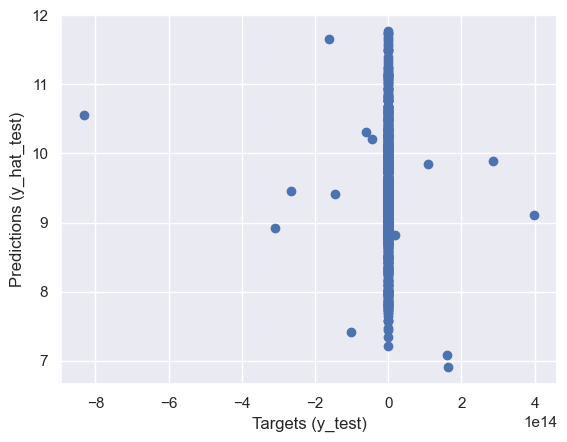

In [41]:
# create a scatter plot 
plt.scatter(y_hat_test, y_test)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.show()

In [42]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns=['Prediction'])
df_pf

C:\Users\hp\AppData\Local\Temp\ipykernel_12032\4154896407.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test) , columns=['Prediction'])


,Prediction
0,25717.777008
1,6918.466797
2,36749.185381
3,11007.200534
4,4057.239343
...,...
769,4306.274263
770,8664.999281
771,12018.417654
772,28611.561464


In [43]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test

0      10.085767
1       9.093807
2      11.154821
3       9.457200
4       8.594154
         ...    
769     8.342840
770     9.082507
771     9.472628
772    10.203592
773     9.296518
Name: log_price, Length: 774, dtype: float64

In [44]:
df_pf["Targets"] = np.exp(y_test)
df_pf

,Prediction,Targets
0,25717.777008,23999.0
1,6918.466797,8900.0
2,36749.185381,69900.0
3,11007.200534,12800.0
4,4057.239343,5400.0
...,...,...
769,4306.274263,4200.0
770,8664.999281,8800.0
771,12018.417654,12999.0
772,28611.561464,27000.0


In [45]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Prediction,Targets,Residual,Difference%
0,25717.777008,23999.0,-1718.777008,7.161869
1,6918.466797,8900.0,1981.533203,22.264418
2,36749.185381,69900.0,33150.814619,47.426058
3,11007.200534,12800.0,1792.799466,14.006246
4,4057.239343,5400.0,1342.760657,24.865938
...,...,...,...,...
769,4306.274263,4200.0,-106.274263,2.530340
770,8664.999281,8800.0,135.000719,1.534099
771,12018.417654,12999.0,980.582346,7.543521
772,28611.561464,27000.0,-1611.561464,5.968746


In [46]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Targets,Residual,Difference%
431,13999.59,13999.00,-0.59,0.00
84,35862.85,35900.00,37.15,0.10
104,6108.51,6100.00,-8.51,0.14
135,64891.69,65000.00,108.31,0.17
433,43090.21,43163.25,73.04,0.17
214,25455.42,25500.00,44.58,0.17
187,9322.61,9300.00,-22.61,0.24
700,3587.50,3600.00,12.50,0.35
316,24088.94,24000.00,-88.94,0.37
546,2910.93,2900.00,-10.93,0.38


In [47]:
df_pf.describe(include = "all")

,Prediction,Targets,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,inf,18380.21,-inf,inf
std,NaN,19781.65,NaN,NaN
min,0.00,999.00,-inf,0.00
25%,7135.47,7200.00,-1471.42,5.92
50%,11717.10,11850.00,5.95,12.63
75%,22185.54,21500.00,1311.81,22.72
max,inf,129222.00,115555.00,inf
